**CSI 4506 Introduction à l'Intelligence Artificielle** <br/>
*Devoir 1 : Préparation des Données*

# Identification

Nom : Avnish Dip<br/>
Numéro d'étudiant : 300176591

# Analyse Exploratoire

## Importer les bibliothèques importantes


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Lire un de données

Comme indiqué dans la description du devoir, il doit être possible pour les correcteurs d'exécuter votre notebook sans nécessiter de téléchargements.

Pour faciliter l'accès à l'ensemble de données sans nécessiter de téléchargements, utilisez les données fournies dans le dépôt public GitHub et fournissez un lien vers la version brute de l'ensemble de données.

Le lien vers la version brute est le suivant :

*https://raw.githubusercontent.com/NOM_UTILISATEUR_GITHUB/NOM_DÉPÔT/main/NOM_JEU_DONNÉES.csv*

Par exemple :

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv](https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Maintenant, fournissez le lien vers VOTRE ensemble de données et lisez-le :


In [ ]:
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"

dataset = pd.read_csv(url)

## Directives

Les questions suivantes sont pour le Devoir 1. Sous chaque question, nous avons fourni une cellule de code initiale. Vous êtes encouragés à ajouter des cellules de code supplémentaires pour maintenir une séparation logique de votre code. Par exemple, placez la définition d'une fonction dans une cellule et son exécution dans une cellule suivante. Cette approche aidera à préserver la clarté et à améliorer la lisibilité en évitant de placer trop de code dans une seule cellule.

1. **Analyse des valeurs manquantes** : Examinez les jeux de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que '?', des chaînes vides ou d'autres substituts.

    1.1 Parmi les options listées, quels sont les jeux de données qui contiennent des valeurs manquantes ? Plus précisément, quel attribut ou quels attributs ont des valeurs manquantes ?

        Jeux de données dermatology_database_1.csv

        Jeu de données de dermatologie

        Attribut 'age'

    1.2 Décrivez la méthodologie utilisée pour cette investigation, et fournissez le code correspondant.

        J'ai utilisé la fonction `isnull()` de la bibliothèque `pandas` pour identifier les valeurs manquantes dans chaque colonne du jeu de données. Ensuite, j'ai appliqué la fonction `sum()` pour compter le nombre total de valeurs manquantes par colonne.

        Il est important de noter que je voulais voire si il y a une autre fonction pour verifier si des caracteres comme "?" existe, mais je ne l'ai pas eu. Je continuerai ma recherche dans le futur. J'ai definie le "?" comme une NA value pour le but de ce devoir.

    1.3 L'imputation des données consiste à remplacer les données manquantes ou incomplètes par des valeurs substituées pour préserver l'intégrité de l'ensemble de données en vue d'analyses ultérieures. Proposez des stratégies d'imputation pour chaque attribut avec des valeurs manquantes.

          Comme dans le pdf du devoir j'ai traité les symboles '?' comme des valeurs manquantes. Pour les colonnes numériques, l'imputation par la moyenne est utilisé pour remplacer les valeurs manquantes par la moyenne des attributs. Pour les colonnes catégorielles, l'imputation par la valeur la plus fréquente (mode).



In [ ]:
missing_values = dataset.isnull().sum()
print("Missing Values per Column:\n", missing_values)

Missing Values per Column:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


2. **Sélectionnez et familiarisez-vous avec une tâche de classification :** Choisissez l'un des jeux de données fournis pour une exploration plus approfondie. Il est conseillé de sélectionner un jeu de données contenant un nombre suffisamment important d'exemples, idéalement environ 1 000, pour garantir des résultats robustes lors de l'application des algorithmes d'apprentissage automatique dans le devoir suivant.

    2.1 Quel est l'objectif de la tâche ? Est-elle destinée à une application spécifique ? Possédez-vous une expertise dans ce domaine d'application particulier ?
        


In [ ]:
# Cette étude vise principalement à prédire la catégorie d'un trouble dermatologique chez un patient en se basant sur 34 caractéristiques cliniques (par exemple, l'épaisseur de l'épiderme, la desquamation, la kératinisation). L'étiquette cible comprend six types de troubles dermatologiques, tels que : • Psoriasis, • Dermatite séborrhéique, Cela pose un problème de classification multi-classes.
# Lichen planus, Pityriasis rosea, Dermatite persistante, La tuberculose rubra
# pilaris.

# Cette type de classification est spécifiquement destiné au domaine médical, plus précisément à la dermatologie. Il permet d'assister les professionnels de la santé dans le diagnostic des troubles dermatologiques. L'utilisation d'un modèle de classification peut améliorer la rapidité et la précision des diagnostics. Donc oui, spécifique.

# Je n'ai aucune expertise dans ce domaine.

3. **Analyse des attributs** :

    3.1 Déterminez quels attributs manquent d'informativité et devraient être exclus pour améliorer l'efficacité de l'analyse d'apprentissage automatique. Si toutes les caractéristiques sont jugées pertinentes, indiquez explicitement cette conclusion.

    3.2 Examinez la distribution de chaque attribut (colonne) au sein de l'ensemble de données. Utilisez des histogrammes ou des boxplots pour visualiser les distributions, en identifiant les motifs sous-jacents ou les valeurs aberrantes.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
# Load the dataset first
dataset = pd.read_csv(url)

# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Select only numeric columns for variance calculation
numeric_dataset = dataset.select_dtypes(include=np.number)

# Calculate the variance of numeric attributes
variances = numeric_dataset.var()
print("Variance des attributs:\n", variances)

# Detect attributes with very low variance (e.g., variance < 0.01)
low_variance_columns = [col for col in numeric_dataset.columns if numeric_dataset[col].var() < 0.01]
print("Attributs avec faible variance (potentiellement non informatifs):", low_variance_columns)

#Gemini utilise pour cela

Missing Values per Column:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Variance des attributs:
 Age            181.559065
SystolicBP     338.704005
DiastolicBP    192.815323
BS              10.847351
BodyTemp         1.880695
HeartRate       65.427104
dtype: float64
Attributs avec faible variance (potentiellement non informatifs): []


4. **Analyse de la distribution des classes** : Examinez la distribution des étiquettes de classe au sein jeu de données. Utilisez des diagrammes en barres pour visualiser la fréquence des instances pour chaque classe et évaluez si l'ensemble de données est équilibré ou déséquilibré.


Missing Values per Column:
 Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
Variance des attributs:
 Age            181.559065
SystolicBP     338.704005
DiastolicBP    192.815323
BS              10.847351
BodyTemp         1.880695
HeartRate       65.427104
dtype: float64
Attributs avec faible variance (potentiellement non informatifs): []


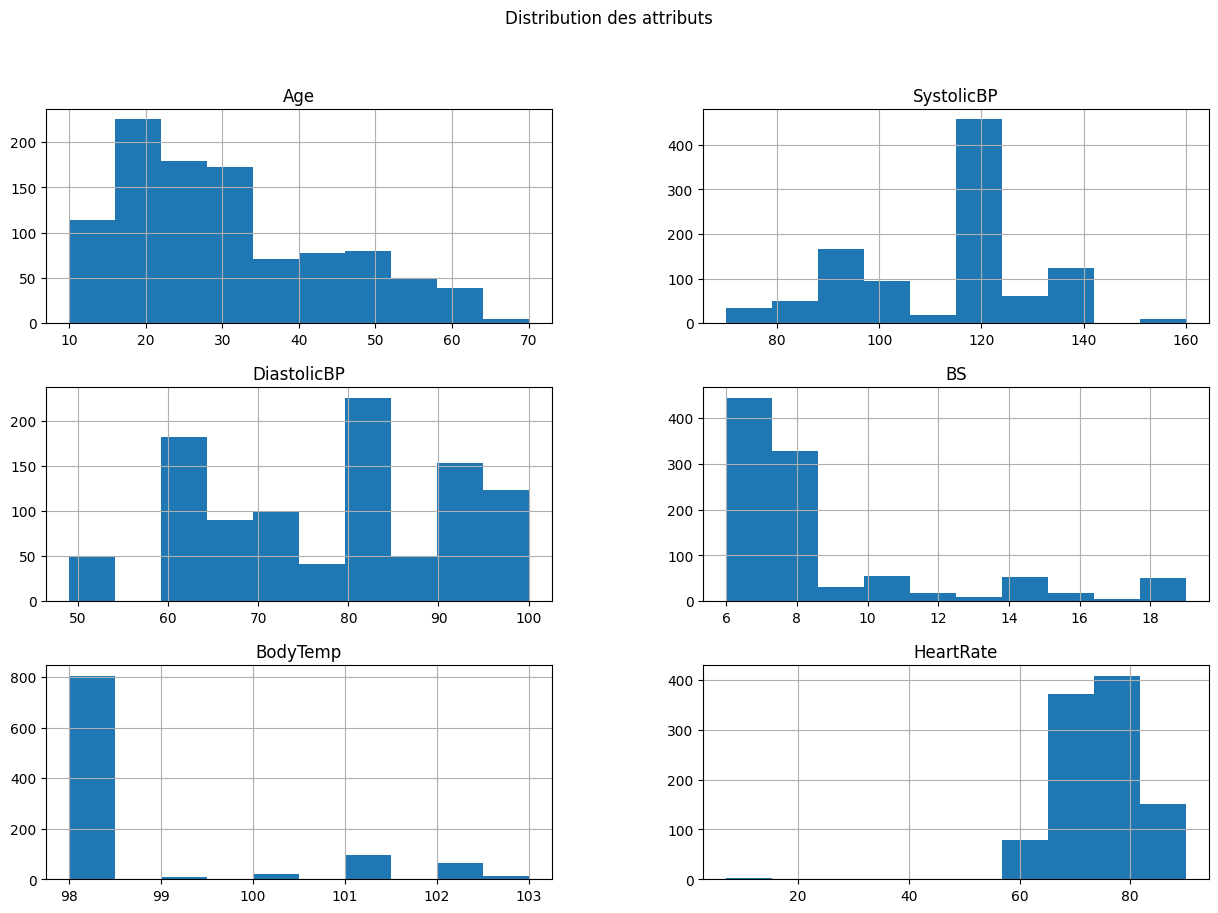

ValueError: Could not interpret value `class` for `x`. An entry with this name does not appear in `data`.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv"
# Load the dataset first
dataset = pd.read_csv(url)

# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing Values per Column:\n", missing_values)

# Select only numeric columns for variance calculation
numeric_dataset = dataset.select_dtypes(include=np.number)

# Calculate the variance of numeric attributes
variances = numeric_dataset.var()
print("Variance des attributs:\n", variances)

# Detect attributes with very low variance (e.g., variance < 0.01)
low_variance_columns = [col for col in numeric_dataset.columns if numeric_dataset[col].var() < 0.01]
print("Attributs avec faible variance (potentiellement non informatifs):", low_variance_columns)

numeric_dataset.hist(figsize=(15, 10))
plt.suptitle('Distribution des attributs')
plt.show()

# Gemini m'a aide a debugger cela

5. **Prétraitement** :

    5.1 Pour les attributs numériques, déterminez la meilleure transformation à utiliser. Indiquez la transformation qui semble appropriée et pourquoi. Incluez le code illustrant comment appliquer la transformation. Pour au moins un attribut, montrez la distribution avant et après la transformation. Voir [Prétraitement des données](https://scikit-learn.org/stable/modules/preprocessing.html).

    5.2 Pour les attributs catégoriels, montrez comment appliquer [l'encodage one-hot](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Si votre ensemble de données ne contient pas de données catégorielles, montrez comment appliquer l'encodeur one-hot à l'étiquette (variable cible).


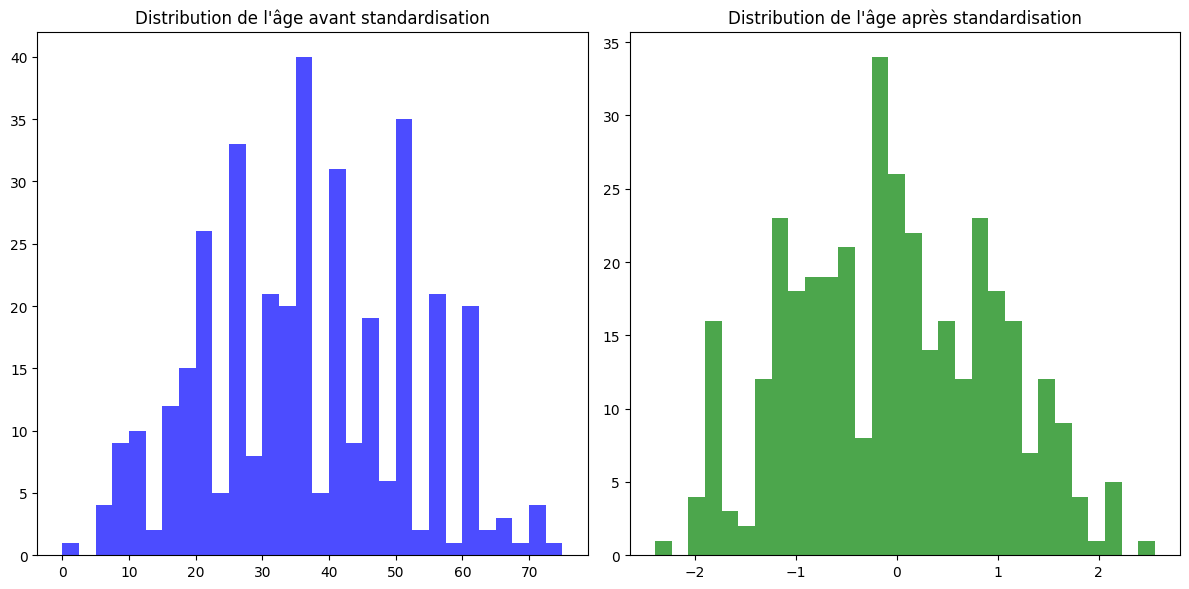

Étiquettes encodées:
 [[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/02/dermatology_database_1.csv"
dataset = pd.read_csv(url, na_values="?")
dataset.head()

imputer_mean = SimpleImputer(strategy='mean')
dataset_imputed = pd.DataFrame(imputer_mean.fit_transform(dataset), columns=dataset.columns)


X_numeric = dataset_imputed.drop('class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(dataset_imputed['age'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution de l\'âge avant standardisation')

plt.subplot(1, 2, 2)
plt.hist(X_scaled_df['age'], bins=30, color='green', alpha=0.7)
plt.title('Distribution de l\'âge après standardisation')

plt.tight_layout()
plt.show()


encoder = OneHotEncoder(sparse_output=False)

y_encoded = encoder.fit_transform(dataset_imputed[['class']])

print("Étiquettes encodées:\n", y_encoded)



6. **Données d'entraînement et cible** : Définissez la variable Python `X` pour désigner les données et `y` pour désigner la classe cible. Assurez-vous de sélectionner uniquement les caractéristiques informatives.

    `X` est defini comme étant toutes les colonnes sauf la colonne `class`, car celle-ci représente notre variable cible. Les caractéristiques informatives sont donc toutes les autres colonnes. Ensuite, j’ai standardisé les données pour `X` à l’aide du **StandardScaler** pour que toutes les variables aient une échelle commune. La variable cible `y` a été encodée à l’aide du **One-Hot Encoding**, car il s’agit d’une variable catégorielle. Finalement, j’ai divisé les données en ensembles d'entraînement et de test avec une proportion de 80% pour l’entraînement et 20% pour le test, afin de préparer les données pour l’apprentissage automatique.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/02/dermatology_database_1.csv"
dataset = pd.read_csv(url, na_values="?")
dataset.head()

imputer_mean = SimpleImputer(strategy='mean')
dataset_imputed = pd.DataFrame(imputer_mean.fit_transform(dataset), columns=dataset.columns)

X = dataset_imputed.drop('class', axis=1)
y = dataset_imputed['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

print(f"Taille des données d'entraînement X: {X_train.shape}, y: {y_train.shape}")
print(f"Taille des données de test X: {X_test.shape}, y: {y_test.shape}")

Taille des données d'entraînement X: (292, 34), y: (292, 6)
Taille des données de test X: (74, 34), y: (74, 6)


7. **Ensembles d'entraînement et de test** : Divisez l'ensemble de données en ensembles d'entraînement et de test. Réservez 20 % des données pour les tests.


--------------------------------------------------------------------------

# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).

Références :
Dataset Source: Dermatology Dataset. Disponible à : https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/02/dermatology_database_1.csv

Scikit-learn Preprocessing: Documentation officielle pour le prétraitement des données. Disponible à : https://scikit-learn.org/stable/modules/preprocessing.html

One-Hot Encoding with Scikit-learn: Documentation officielle pour l'encodage One-Hot. Disponible à : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Train-Test Split with Scikit-learn: Documentation officielle pour la division des ensembles d'entraînement et de test. Disponible à : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Imputation of Missing Values: Documentation pour l’imputation des valeurs manquantes avec SimpleImputer. Disponible à : https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

StandardScaler in Scikit-learn: Documentation officielle pour la standardisation des données. Disponible à : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html



